In [45]:
import numpy as np
from sklearn import datasets

In [46]:
iris = datasets.load_iris()

In [47]:
X = iris.data[:,[2,3]]


In [48]:
y = iris.target

In [49]:
import sklearn
from sklearn.cross_validation import train_test_split

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [51]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [52]:
sc = StandardScaler()

In [53]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [55]:
from sklearn.linear_model import Perceptron

In [56]:
ppn = Perceptron(n_iter=40,eta0=0.1,random_state=0)
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [57]:
y_pred = ppn.predict(X_test_std)

In [58]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0])

In [59]:
(y_test==y_pred).sum()

41

In [60]:
from sklearn.metrics import accuracy_score
print ('Accuracy Score %.2f' %accuracy_score(y_test,y_pred))

Accuracy Score 0.91


In [61]:
from mlxtend.evaluate import plot_decision_regions

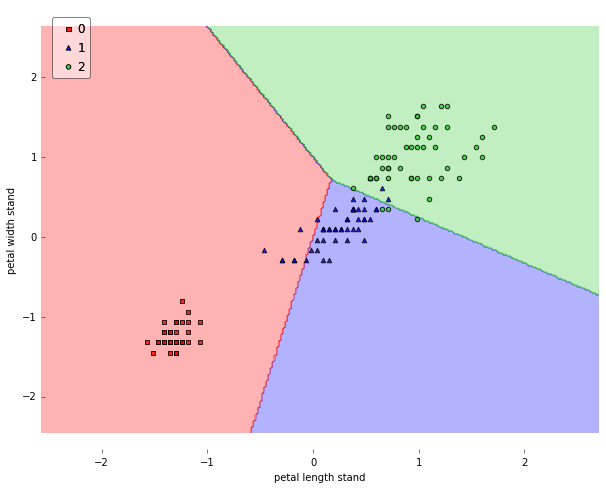

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10, 8))


X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
fig = plot_decision_regions(X=X_combined_std, y=y_combined,
                                clf=ppn, legend=2)
plt.xlabel('petal length stand')
plt.ylabel('petal width stand')
plt.show()

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std,y_train)
y_pred_lr = lr.predict(X_test_std)

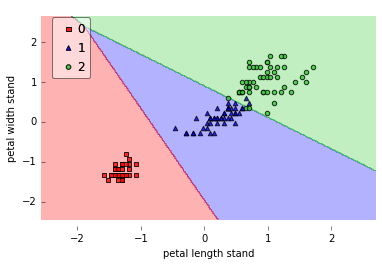

In [65]:
fig = plot_decision_regions(X=X_combined_std, y=y_combined,
                                clf=lr, legend=2)
plt.xlabel('petal length stand')
plt.ylabel('petal width stand')
plt.show()

In [66]:
print ('Accuracy Score %.2f' %accuracy_score(y_test,y_pred_lr))

Accuracy Score 0.98


In [68]:
from sklearn.svm import SVC
svm =  SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(X_train_std,y_train)
y_pred_svm = svm.predict(X_test_std)


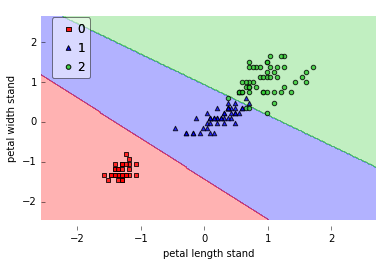

In [69]:
fig = plot_decision_regions(X=X_combined_std, y=y_combined,
                                clf=svm, legend=2)
plt.xlabel('petal length stand')
plt.ylabel('petal width stand')
plt.show()

In [70]:
print ('Accuracy Score %.2f' %accuracy_score(y_test,y_pred_svm))

Accuracy Score 0.98


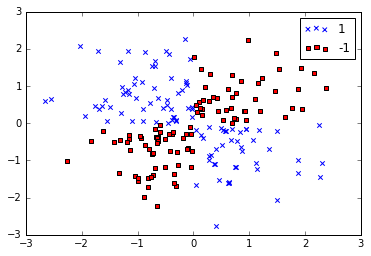

In [85]:
np.random.seed(0)
X_xor= np.random.randn(200,2)
y_xor=np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
y_xor = np.where(y_xor,1,-1)
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],c='r',marker='s',label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

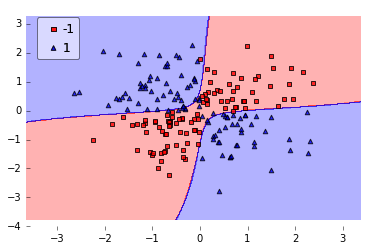

In [99]:
svm = SVC(kernel='rbf',random_state=0,gamma=0.1,C=10)
svm.fit(X_xor,y_xor)
fig = plot_decision_regions(X=X_xor, y=y_xor,
                                clf=svm, legend=2)
plt.show()

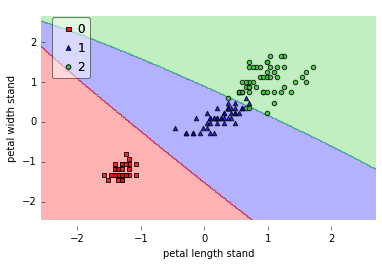

In [116]:
svm =  SVC(kernel='rbf',random_state=0,gamma=0.1,C=1)
svm.fit(X_train_std,y_train)
y_pred_svm = svm.predict(X_test_std)
fig = plot_decision_regions(X=X_combined_std, y=y_combined,
                                clf=svm, legend=2)
plt.xlabel('petal length stand')
plt.ylabel('petal width stand')
plt.show()